In [ ]:
!pip install penman

In [ ]:
from google.colab import files
uploads=files.upload()

Saving qald-9-amr-train.txt to qald-9-amr-train (1).txt
Saving qald-9-amr-test.txt to qald-9-amr-test (1).txt


In [ ]:
import penman

# Load AMR data from a file
with open('qald-9-amr-test.txt', 'r', encoding='utf-8') as f:
    amr_data_test = f.read()
with open('qald-9-amr-train.txt','r',encoding='utf-8') as f:
    amr_data_train=f.read()
# with open('qald-9-amr-dev.txt','r',encoding='utf-8') as f:
#   amr_data+=f.read()
# Parse AMR data
# graphs = penman.loads(amr_data_trai)
graphs_train = penman.loads(amr_data_train) # each ::snt has a graph. Cool! 408 graphs.
graphs_test = penman.loads(amr_data_test)
# Could use tree as well. Multiple interpretations possible.
# Accessing and printing each parsed graph
# print(len(graphs)) # 408

# for graph in graphs_test:
#     # print(graph)
#     print("Triples:", graph.triples)
#     # print("Root:", graph.top)
#     print()


Triples: [('z', ':instance', 'zone'), ('z', ':mod', 't'), ('t', ':instance', 'time'), ('z', ':poss', 'c'), ('c', ':instance', 'city'), ('c', ':name', 'n'), ('n', ':instance', 'name'), ('n', ':op1', '"Salt"'), ('n', ':op2', '"Lake"'), ('n', ':op3', '"City"'), ('z', ':domain', 'a'), ('a', ':instance', 'amr-unknown')]

Triples: [('k', ':instance', 'kill-01'), ('k', ':ARG0', 'a'), ('a', ':instance', 'amr-unknown'), ('k', ':ARG1', 'p'), ('p', ':instance', 'person'), ('p', ':name', 'n'), ('n', ':instance', 'name'), ('n', ':op1', '"Caesar"')]

Triples: [('h', ':instance', 'have-degree-91'), ('h', ':ARG1', 'a'), ('a', ':instance', 'amr-unknown'), ('h', ':ARG2', 'h2'), ('h2', ':instance', 'high-02'), ('h2', ':ARG1', 'a'), ('h', ':ARG3', 'm2'), ('m2', ':instance', 'most'), ('h', ':ARG5', 'm3'), ('m3', ':instance', 'mountain'), ('m3', ':location', 'c'), ('c', ':instance', 'countrty'), ('c', ':name', 'n'), ('n', ':instance', 'name'), ('n', ':op1', '"Germany"')]

Triples: [('h', ':instance', 'have-

In [ ]:
print(graphs_test[1].metadata.get("snt",None))

Who killed Caesar?


In [ ]:
import networkx as nx
from networkx.algorithms.traversal.breadth_first_search import bfs_edges
from networkx.algorithms.traversal.depth_first_search import dfs_edges
import penman

# Create a directed graph
def traverse_graphs(graph):
    nx_graph = nx.DiGraph()
    # Add nodes and edges to the graph
    for source, relation, target in graph.triples:
        # print(source, target)
        nx_graph.add_edge(source, target, label=relation)
    # Perform BFS and DFS starting from the root node

    bfs_result = list(bfs_edges(nx_graph, source=graph.top))
    dfs_result = list(dfs_edges(nx_graph, source=graph.top))

    # for u, v in bfs_result:
    #     edge_data = graph.get_edge_data(u, v)  # Get edge data (attributes)
    #     edge_label = edge_data.get('label', 'No label')  # Access the 'label' attribute
    #     print('edge_label:', edge_label)
    return bfs_result, dfs_result
# print(bfs_result)
# print(dfs_result)

In [ ]:
from collections import deque
import json


#### NOTE: This code! #####
# Example graph
# graph = {
#     'A': ['B', 'C'],
#     'B': ['A', 'D'],
#     'C': ['A', 'D'],
#     'D': ['B', 'C']
# }

def graph2adj_list(graph):
    graph_dict = {}
    for source, relation, target in graph.triples:
        if source not in graph_dict:
            graph_dict[source] = {}
        if target not in graph_dict:
            graph_dict[target] = {}
        graph_dict[source][target] = relation
    return graph_dict
# print(graph)
# print(graph2adj_list(graph))

# BFS Implementation
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    bfs_string = ''

    while queue:
        node = queue.popleft()
        # print(node, end=' ')

        for neighbor, edge_relation in graph[node].items(): # find neighbours
            if neighbor not in visited:
                bfs_string += node + ' ' + edge_relation + ' ' + neighbor + ' '
                visited.add(neighbor)
                queue.append(neighbor)

    return bfs_string

def dfs(graph, start):
    visited = set()
    stack = [start]
    visited.add(start)

    dfs_string = ''

    while stack:
        node = stack.pop()

        for neighbor, edge_relation in graph[node].items():
            if neighbor not in visited:
                dfs_string += node + ' ' + edge_relation + ' ' + neighbor + ' | '
                visited.add(neighbor)
                stack.append(neighbor)

    return dfs_string

# print(bfs(graph2adj_list(graph), graph.top))

bfs_train_amr = {}
dfs_train_amr = {}

for idx, graph in enumerate(graphs_train):
    graph_adj_list = graph2adj_list(graph)
    bfs_string = bfs(graph_adj_list, graph.top)
    dfs_string = dfs(graph_adj_list, graph.top)
    bfs_train_amr[idx] = {'amr': bfs_string, 'text': graph.metadata.get('snt', None)}
    dfs_train_amr[idx] = {'amr': dfs_string, 'text': graph.metadata.get('snt', None)}

bfs_test_amr = {}
dfs_test_amr = {}

for idx, graph in enumerate(graphs_test):
    graph_adj_list = graph2adj_list(graph)
    bfs_string = bfs(graph_adj_list, graph.top)
    dfs_string = dfs(graph_adj_list, graph.top)
    bfs_test_amr[idx] = {'amr': bfs_string, 'text': graph.metadata.get('snt', None)}
    dfs_test_amr[idx] = {'amr': dfs_string, 'text': graph.metadata.get('snt', None)}

with open('bfs_train.json', 'w') as f:
    json.dump(bfs_train_amr, f)

with open('dfs_train.json', 'w') as f:
    json.dump(dfs_train_amr, f)

with open('bfs_test.json', 'w') as f:
    json.dump(bfs_test_amr, f)

with open('dfs_test.json', 'w') as f:
    json.dump(dfs_test_amr, f)


In [ ]:
bfs_result,dfs_result=traverse_graphs(graphs_train[1])
print(bfs_result)
print(dfs_result)

[('d', 'develop-02'), ('d', 'a'), ('d', 'p'), ('a', 'amr-unknown'), ('p', 'product'), ('p', 'n'), ('n', 'name'), ('n', '"Skype"')]
[('d', 'develop-02'), ('d', 'a'), ('a', 'amr-unknown'), ('d', 'p'), ('p', 'product'), ('p', 'n'), ('n', 'name'), ('n', '"Skype"')]


In [ ]:

def find_data_bfs_dfs(graphs):
  bfs_result_list=list()
  dfs_result_list=list()
  index_list=list()
  text_dict=dict()
  bfs_dict=dict()
  dfs_dict=dict()
  for i,graph in enumerate(graphs):
    # try:
      print(i, end='\r')
      bfs_result,dfs_result=traverse_graphs(graph)
      bfs_dict[i]=bfs_result
      dfs_dict[i]=dfs_result
      index_list.append(i)
      text_dict[i]=graph.metadata.get("snt",None)
    # except Exception as e:
      # print(e)
  # print(bfs_result_list)
  # print(dfs_result_list)
  return bfs_dict,dfs_dict,index_list,text_dict

In [ ]:
bfs_dict_train,dfs_dict_train,index_list_train,text_dict_train=find_data_bfs_dfs(graphs_train)

In [ ]:
bfs_dict_test,dfs_dict_test,index_list_test,text_dict_test=find_data_bfs_dfs(graphs_test)

In [ ]:
import json
def make_json_files(bfs_dict,dfs_dict,text_dict,train):
  if train:
    with open('bfs_train.json','w') as f:
      json.dump(bfs_dict,f)
    with open('dfs_train.json','w') as f:
      json.dump(dfs_dict,f)
    with open('text_train.json','w') as f:
      json.dump(text_dict,f)
  else:
    with open('bfs_test.json','w') as f:
      json.dump(bfs_dict,f)
    with open('dfs_test.json','w') as f:
      json.dump(dfs_dict,f)
    with open('text_test.json','w') as f:
      json.dump(text_dict,f)



In [ ]:
make_json_files(bfs_dict_train,dfs_dict_train,text_dict_train,True)
make_json_files(bfs_dict_test,dfs_dict_test,text_dict_test,False)

In [ ]:
from google.colab import files
uploads=files.upload()

Saving massive_amr (1).jsonl to massive_amr (1).jsonl


In [ ]:
import json

file_path = 'massive_amr (1).jsonl'  # Replace with your file path

# Open the file and read it line by line
with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

# Example: Print the first JSON object
print(data[0])  # Each element in `data` is a JSON object (dictionary)


{'id': '2997', 'locale': 'en-US', 'partition': 'train', 'scenario': 'qa', 'intent': 'qa_stock', 'utt': 'what are some updates about the stock market', 'annot_utt': 'what are some updates about the [news_topic : stock market]', 'worker_id': '263', 'raw_amr': '(u / update-02\n      :ARG2 (a / amr-unknown)\n      :topic (m / market-01\n            :ARG1 (s / stock))\n      :mod (s2 / some))'}


In [ ]:
train_list=list()
test_list=list()
val_list=list()
for d in data:
  if d['partition']=='train':
    train_list.append(d)
  elif d['partition']=='test':
    test_list.append(d)
  else:
    val_list.append(d)


In [ ]:
print(train_list)
print(test_list)
print(val_list)

[{'id': '2997', 'locale': 'en-US', 'partition': 'train', 'scenario': 'qa', 'intent': 'qa_stock', 'utt': 'what are some updates about the stock market', 'annot_utt': 'what are some updates about the [news_topic : stock market]', 'worker_id': '263', 'raw_amr': '(u / update-02\n      :ARG2 (a / amr-unknown)\n      :topic (m / market-01\n            :ARG1 (s / stock))\n      :mod (s2 / some))'}, {'id': '13851', 'locale': 'en-US', 'partition': 'train', 'scenario': 'qa', 'intent': 'qa_definition', 'utt': 'can you describe to me what a pineapple looks like', 'annot_utt': 'can you describe to me what a [definition_word : pineapple] looks like', 'worker_id': '477', 'raw_amr': '(d / describe-01 :mode imperative :polite +\n      :ARG0 (y / you)\n      :ARG1 (t / thing\n            :ARG1-of (l / look-02\n                  :ARG0 (f / food-dish :name (n / name :op1 "pineapple")))))'}, {'id': '14422', 'locale': 'en-US', 'partition': 'train', 'scenario': 'qa', 'intent': 'qa_currency', 'utt': 'what is 

In [ ]:
print(len(train_list))
print(len(test_list))
print(len(val_list))

1183
288
214


In [ ]:
def store_data(fpath,data_list):
  with open(fpath, 'w') as file:
    for entry in data_list:
        json_line = json.dumps(entry)
        file.write(json_line + '\n')
store_data('train_data.jsonl',train_list)
store_data('test_data.jsonl',test_list)
store_data('val_data.jsonl',val_list)

In [ ]:
with open('val_data.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]
print(data)

[[{'id': '15090', 'locale': 'en-US', 'partition': 'dev', 'scenario': 'qa', 'intent': 'qa_currency', 'utt': 'please look up exchange between us and mexico', 'annot_utt': 'please look up exchange between us and mexico', 'worker_id': '8', 'raw_amr': '(l / look-up-05 :mode imperative :polite +\n      :ARG0 (y / you)\n      :ARG1 (e / exchange-01\n            :ARG1 (c / currency\n                  :mod (c3 / country :name (n / name :op1 "us")))\n            :ARG3 (c2 / currency\n                  :mod (c4 / country :name (n2 / name :op1 "mexico")))))'}, {'id': '13563', 'locale': 'en-US', 'partition': 'dev', 'scenario': 'qa', 'intent': 'qa_definition', 'utt': 'what does potato mean', 'annot_utt': 'what does [definition_word : potato] mean', 'worker_id': '371', 'raw_amr': '(m / mean-01\n      :ARG1 (p / potato)\n      :ARG2 (a / amr-unknown))'}, {'id': '13797', 'locale': 'en-US', 'partition': 'dev', 'scenario': 'qa', 'intent': 'qa_factoid', 'utt': 'how many people live in san francisco', 'ann

In [ ]:
import os
def make_json_files_new(bfs_dict,dfs_dict,text_dict,data_dir):
  with open(os.path.join(data_dir,'bfs.json'),'w') as f:
    json.dump(bfs_dict,f)
  with open(os.path.join(data_dir,'dfs.json'),'w') as f:
    json.dump(dfs_dict,f)
  with open(os.path.join(data_dir,'text.json'),'w') as f:
    json.dump(dfs_dict,f)



In [ ]:
def get_bfs_dfs_massive_amr(data_list,data_path):
  bfs_dict=dict()
  dfs_dict=dict()
  text_dict=dict()
  for d in data_list:
    graph_raw=d['raw_amr']
    penman_graph=penman.decode(graph_raw)
    bfs_result,dfs_result=traverse_graphs(penman_graph)
    bfs_dict[d['id']]=bfs_result
    dfs_dict[d['id']]=dfs_result
    text_dict[d['id']]=d['utt']
  make_json_files_new(bfs_dict,dfs_dict,text_dict,data_path)

get_bfs_dfs_massive_amr(train_list,'massive_amr_train')
get_bfs_dfs_massive_amr(test_list,'massive_amr_test')
get_bfs_dfs_massive_amr(val_list,'massive_amr_val')


In [ ]:
!zip -r massive_amr_train.zip massive_amr_train
!zip -r massive_amr_test.zip massive_amr_test
!zip -r massive_amr_val.zip massive_amr_val


  adding: massive_amr_train/ (stored 0%)
  adding: massive_amr_train/text.json (deflated 86%)
  adding: massive_amr_train/dfs.json (deflated 86%)
  adding: massive_amr_train/bfs.json (deflated 85%)
  adding: massive_amr_train/train_data.jsonl (deflated 86%)
  adding: massive_amr_test/ (stored 0%)
  adding: massive_amr_test/text.json (deflated 85%)
  adding: massive_amr_test/dfs.json (deflated 85%)
  adding: massive_amr_test/test_data.jsonl (deflated 85%)
  adding: massive_amr_test/bfs.json (deflated 84%)
  adding: massive_amr_val/ (stored 0%)
  adding: massive_amr_val/text.json (deflated 85%)
  adding: massive_amr_val/dfs.json (deflated 85%)
  adding: massive_amr_val/val_data.jsonl (deflated 85%)
  adding: massive_amr_val/bfs.json (deflated 83%)


In [ ]:
import re
import random

def split_amr_strings(amr_text):
    """
    Splits AMR text into blocks, each starting with `# ::snt` and containing the associated AMR graph.
    """
    # Match each AMR block starting with # ::snt and ending at the next # ::snt or end of file
    amr_pattern = r"(# ::snt .+?)(?=\n# ::snt|\Z)"
    amr_blocks = re.findall(amr_pattern, amr_text, flags=re.DOTALL)
    return amr_blocks

def create_amr_dict(amr_text):
    """
    Extracts sentences and AMR notations from AMR text, storing them in dictionaries and lists.
    Args:
        amr_text (str): The raw AMR text.
    Returns:
        tuple: A dictionary of AMR data, and separate lists of AMR notations and sentences.
    """
    amr_strings = split_amr_strings(amr_text)
    amr_dict = {}
    amr_list = []
    text_list = []

    for idx, amr_string in enumerate(amr_strings):
        # Extract the `# ::snt` line and the AMR graph
        snt_line = amr_string.split('\n', 1)[0].strip()  # First line is the sentence part
        text_part = re.sub(r'# ::snt ', '', snt_line)    # Remove `# ::snt` prefix
        amr_part = amr_string[len(snt_line):].strip()    # Rest is the AMR graph

        # Add to dictionary
        amr_dict[idx] = {
            "amr": amr_part,
            "text": text_part
        }
        amr_list.append(amr_part)
        text_list.append(text_part)

    return amr_dict, amr_list, text_list

# Example AMR data
amr_data = """
# ::id 14305
# ::snt where is india located
# ::save-date Sunday 21 August 2022
(b / be-located-at-91
      :ARG1 (c / country :name (n / name :op1 "india"))
      :ARG2 (a / amr-unknown))

# ::id 14892
# ::snt how many number of fans does that person have approximately
# ::save-date Sunday 21 August 2022
(h / have-quant-91
      :ARG1 (p / person
            :ARG1-of (h2 / have-rel-role-91
                  :ARG0 (p2 / person
                        :mod (t / that))
                  :ARG2 (f / fan)))
      :ARG2 (a / amr-unknown)
      :ARG1-of (a2 / approximate-01))

# ::id 13233
# ::snt can you add up thirteen plus five plus nine for me
# ::save-date Sunday 21 August 2022
(e / equal-01
      :ARG1 (s / sum-of :op1 13 :op2 5 :op3 9)
      :ARG2 (a / amr-unknown))

# ::id 14381
# ::snt find me the definition of indefatigable
# ::save-date Sunday 21 August 2022
(f / find-01 :mode imperative
      :ARG0 (y / you)
      :ARG1 (t / thing
            :ARG2-of (d / define-01
                  :ARG1 (i2 / indefatigable)))
      :ARG2 (i / i))
"""

# Process the AMR data
amr_dict, amr_list, text_list = create_amr_dict(amr_data)

# Split into train and test (80-20 split)
data = list(zip(text_list, amr_list))
random.shuffle(data)
split_idx = int(len(data) * 0.8)
train_data = data[:split_idx]
test_data = data[split_idx:]

train_texts, train_amrs = zip(*train_data)
test_texts, test_amrs = zip(*test_data)

# Display results
print("Train Sentences:", train_texts)
print("Train AMRs:", train_amrs)
print("Test Sentences:", test_texts)
print("Test AMRs:", test_amrs)


Train Sentences: ('can you add up thirteen plus five plus nine for me', 'find me the definition of indefatigable', 'where is india located')
Train AMRs: ('# ::save-date Sunday 21 August 2022\n(e / equal-01\n      :ARG1 (s / sum-of :op1 13 :op2 5 :op3 9)\n      :ARG2 (a / amr-unknown))\n\n# ::id 14381', '# ::save-date Sunday 21 August 2022\n(f / find-01 :mode imperative\n      :ARG0 (y / you)\n      :ARG1 (t / thing\n            :ARG2-of (d / define-01\n                  :ARG1 (i2 / indefatigable)))\n      :ARG2 (i / i))', '# ::save-date Sunday 21 August 2022\n(b / be-located-at-91\n      :ARG1 (c / country :name (n / name :op1 "india"))\n      :ARG2 (a / amr-unknown))\n\n# ::id 14892')
Test Sentences: ('how many number of fans does that person have approximately',)
Test AMRs: ('# ::save-date Sunday 21 August 2022\n(h / have-quant-91\n      :ARG1 (p / person\n            :ARG1-of (h2 / have-rel-role-91\n                  :ARG0 (p2 / person\n                        :mod (t / that))\n    

In [ ]:
import torch
from tqdm import tqdm
from torch.utils.data import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration

with open('massive_amr_test.txt', 'r', encoding='utf-8') as f:
    amr_data_test = f.read()
with open('massive_amr.txt','r',encoding='utf-8') as f:
    amr_data_train=f.read()


import re

def split_amr_strings(amr_text):
    amr_pattern = r"(# ::snt .+?)(?=\n# ::snt|\Z)"
    amr_blocks = re.findall(amr_pattern, amr_text, flags=re.DOTALL)
    return amr_blocks

def create_amr_dict(amr_text):
    amr_strings = split_amr_strings(amr_text)
    amr_dict = {}
    amr_list = []
    text_list = []
    for idx, amr_string in enumerate(amr_strings):
        # Split each block into the sentence part and the AMR part
        snt_part = amr_string.split('\n', 1)[0].strip()  # First line is the sentence part
        text_part = re.sub('# ::snt ','',snt_part)
        amr_part = amr_string[len(snt_part):].strip()  # Rest is the AMR part

        # Add to dictionary
        amr_dict[idx] = {
            "amr": amr_part,
            "text": text_part
        }
        amr_list.append(amr_part)
        text_list.append(text_part)

    return amr_dict, amr_list, text_list

amr_data_train, _, __ = create_amr_dict(amr_data_train)
amr_data_test, amr_test, text_test = create_amr_dict(amr_data_test)

# Read the data first
import re
import json

def preprocess_amr_data(data):
    amr_complete = []
    text_complete = []

    for entry in data.keys():
        amr_graph = data[entry]['amr']
        target_text = data[entry]['text']
        model_input = amr_graph.strip()
        model_output = target_text.strip()

        amr_complete.append(model_input)
        text_complete.append(model_output)

    return amr_complete, text_complete


def generate_predictions(self, texts):
    model = self.model.module
    model.to('cuda')
    model.eval()
    predictions = []

    for text in tqdm(texts):
        # Add a task-specific prefix for T5
        prefixed_text = "translate AMR to text: " + text

        # Tokenize with T5-specific parameters
        inputs = self.tokenizer(
            prefixed_text,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=384
        ).to('cuda')

        try:
            with torch.no_grad():
                outputs = model.generate(
                    input_ids=inputs.input_ids,
                    attention_mask=inputs.attention_mask,
                    max_length=150,  # Adjust based on your needs
                    min_length=10,   # Adjust based on your needs
                    num_beams=4,
                    length_penalty=1.0,
                    early_stopping=True,
                    do_sample=False,
                    no_repeat_ngram_size=3,
                    pad_token_id=model.config.pad_token_id,
                    eos_token_id=model.config.eos_token_id,
                )

            decoded_preds = self.tokenizer.batch_decode(outputs, skip_special_tokens=True)
            predictions.extend(decoded_preds)
            print(f"Input: {text[:100]}...")
            print(f"Output: {decoded_preds[0]}\n")

        except Exception as e:
            print(f"Error generating for text: {text[:100]}...")
            print(f"Error: {str(e)}")
            predictions.append("")  # Add empty string for failed generations

    return predictions

# Also modify the dataset class to handle T5's format
class QALD_9_AMRDataset(Dataset):
    def __init__(self, data, tokenizer):
        amr, text = preprocess_amr_data(data)
        self.amr_len = len(amr)
        self.text_len = len(text)

        # Add prefix for T5 inputs
        prefixed_amr = ["translate AMR to text: " + x for x in amr]

        # T5-specific tokenization
        self.amr = tokenizer(
            prefixed_amr,
            truncation=True,
            padding='max_length',
            max_length=384,
            return_tensors='pt'
        )

        self.text = tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=384,
            return_tensors='pt'
        )

    def __len__(self):
        assert self.amr_len == self.text_len
        return self.amr_len

    def __getitem__(self, idx):
        return {
            'amr': self.amr['input_ids'][idx],
            'att_mask': self.amr['attention_mask'][idx],
            'text': self.text['input_ids'][idx]
        }

# Modified load_train_objs function for T5
def load_train_objs(preTmodel):
    if preTmodel == 'T5':
        tokenizer = T5Tokenizer.from_pretrained("t5-base")  # Using t5-base instead of t5-small
        model = T5ForConditionalGeneration.from_pretrained('t5-base')

        # Ensure all necessary special tokens are present
        special_tokens = {
            'pad_token': '[PAD]',
            'eos_token': '</s>',
            'bos_token': '<s>',
        }
        tokenizer.add_special_tokens(special_tokens)
        model.resize_token_embeddings(len(tokenizer))

    train_dataset = QALD_9_AMRDataset(amr_data_train, tokenizer)
    val_dataset = QALD_9_AMRDataset(amr_data_test, tokenizer)
    optimizer = torch.optim.AdamW(model.parameters(), lr=3e-5)
    return train_dataset, val_dataset, model, tokenizer, optimizer

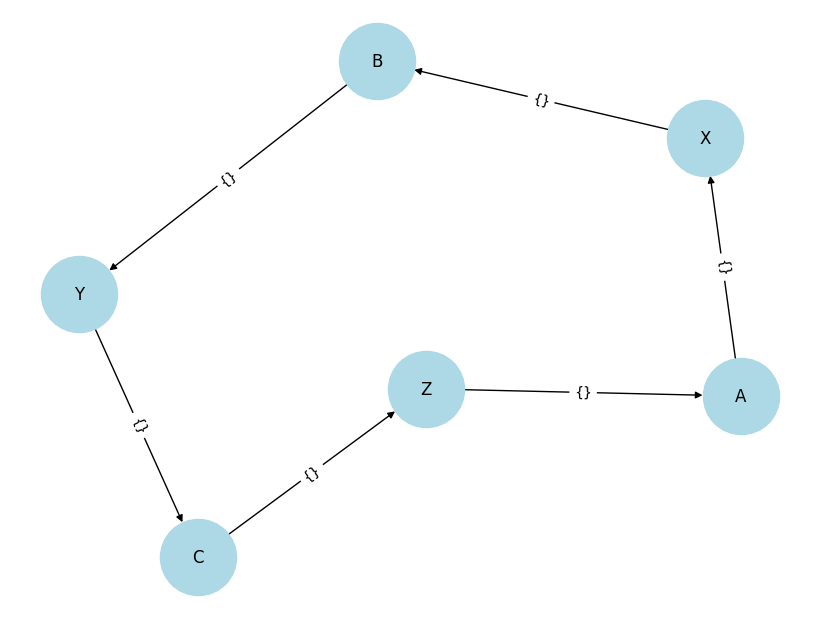

In [ ]:
import networkx as nx

# Original directed graph with labeled edges
G = nx.DiGraph()
G.add_edge("A", "B", label="X")
G.add_edge("B", "C", label="Y")
G.add_edge("C", "A", label="Z")

# New directed graph
G_prime = nx.DiGraph()

# Add original nodes to the new graph
G_prime.add_nodes_from(G.nodes)

# Add new nodes for edges and connect them
for u, v, data in G.edges(data=True):
    label = data["label"]

    # Create a new node for the edge
    edge_node = f"{label}"
    G_prime.add_node(edge_node)

    # Connect the original nodes to the new edge node
    G_prime.add_edge(u, edge_node)  # From original source to new edge node
    G_prime.add_edge(edge_node, v)  # From new edge node to original target

# Visualization (optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_prime)  # Layout for better visualization
nx.draw(G_prime, pos, with_labels=True, node_size=3000, node_color="lightblue")
nx.draw_networkx_edge_labels(
    G_prime, pos, edge_labels={(u, v): d for u, v, d in G_prime.edges(data=True)}
)
plt.show()


In [ ]:
from transformers import GPT2Tokenizer, GPT2Model
import torch
import numpy as np

# Initialize the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained("gpt2")

# Input string
input_text = """(r / rate-01 :ARG1 (c / currency :name (n / name :op1 "british" :op2 "pound")) :ARG2 (a / amr-unknown))"""

# Tokenize the text
tokens = tokenizer(input_text, return_tensors="pt", add_special_tokens=False)
input_ids = tokens["input_ids"]
#offset_mapping = tokens["offset_mapping"][0].tolist()  # Corresponds to word-piece alignments

# Print tokenized input
tokenized_words = tokenizer.convert_ids_to_tokens(input_ids.squeeze().tolist())
print("Tokenized Input:")
for idx, token in enumerate(tokenized_words):
    token = token.replace("Ġ", " ")  # Remove the special token
    print(f"{token} |", end="")

print("\n\n\n")

# Get embeddings for the tokenized input
with torch.no_grad():
    outputs = model(input_ids)
    token_embeddings = outputs.last_hidden_state.squeeze(0)  # Shape: (num_tokens, hidden_size)

# Print embeddings for tokenized input
print("\nTokenized Input Embeddings (first 5 dimensions):")
for idx, token in enumerate(tokenized_words):
    embedding = token_embeddings[idx].numpy()
    token = token.replace("Ġ", "")
    #print(f"Token: {token}, Embedding: {embedding[:5]}...")  # Print first 5 dimensions for brevity

words = input_text.split()

def get_word_to_tokens_map(text, token_list):
    """
    Maps each word in the text to its corresponding token indices.

    Parameters:
    text (str): Original text string
    token_list (list): List of subword tokens

    Returns:
    dict: Dictionary mapping each word to a list of its token indices
    """
    words = text.split()
    word_to_tokens = {}
    current_pos = 0

    for word in words:
        # Initialize variables for the current word
        word_tokens = []
        temp_word = ""
        start_idx = current_pos

        # Keep adding tokens until we reconstruct the word
        while current_pos < len(token_list):
            temp_word += token_list[current_pos].replace('Ġ', '').replace('▁', '')  # Remove GPT/BERT special chars
            word_tokens.append(current_pos)

            # If we've found the complete word
            if temp_word.lower() == word.lower():
                word_to_tokens[word] = word_tokens
                current_pos += 1
                break
            # If we've gone too far, something's wrong
            elif len(temp_word) > len(word):
                raise ValueError(f"Unable to map word '{word}' to tokens")

            current_pos += 1

    return word_to_tokens

print(get_word_to_tokens_map(input_text, tokenized_words))


# # Map words to subwords using the offset mapping
# word_to_tokens = {}
# for i, (start, end) in enumerate(offset_mapping):
#     if start != 0 or end != 0:  # Ignore special tokens, if any
#         word = input_text[start:end]
#         if word not in word_to_tokens:
#             word_to_tokens[word] = []
#         word_to_tokens[word].append(i)

# # Aggregate subword embeddings for each word
# word_embeddings = {}
# for word, token_indices in word_to_tokens.items():
#     # Sum embeddings for subwords
#     summed_embedding = torch.sum(token_embeddings[token_indices], dim=0)
#     # Normalize the summed embedding
#     normalized_embedding = summed_embedding / torch.norm(summed_embedding, p=2)
#     word_embeddings[word] = normalized_embedding

# # Convert to NumPy for easy access
# word_embeddings = {word: emb.numpy() for word, emb in word_embeddings.items()}

# # Print word embeddings
# print("\nWord Embeddings (first 5 dimensions):")
# for word, embedding in word_embeddings.items():
#     print(f"Word: {word}, Embedding: {embedding[:5]}...")  # Print first 5 dimensions for brevity


Tokenized Input:
( |r | / | rate |- |01 | : |AR |G |1 | ( |c | / | currency | : |name | ( |n | / | name | : |op |1 | " |b |rit |ish |" | : |op |2 | " |pound |")) | : |AR |G |2 | ( |a | / | am |r |- |unknown |)) |




Tokenized Input Embeddings (first 5 dimensions):
{'(r': [0, 1], '/': [40], 'rate-01': [3, 4, 5], ':ARG1': [6, 7, 8, 9], '(c': [10, 11], 'currency': [13], ':name': [14, 15], '(n': [16, 17], 'name': [19], ':op1': [20, 21, 22], '"british"': [23, 24, 25, 26, 27], ':op2': [28, 29, 30], '"pound"))': [31, 32, 33], ':ARG2': [34, 35, 36, 37], '(a': [38, 39], 'amr-unknown))': [41, 42, 43, 44, 45]}
